In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ruta_fichero = "numReqYtam.txt"
df = pd.read_csv(ruta_fichero, sep=' ', header=None,
                 names=["bytes_servidor_cliente", "num_pet_http", "codigos_http", "dominio_tls", "puerto"])

df["codigos_http"] = df["codigos_http"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

In [50]:
df.describe()

,bytes_servidor_cliente,num_pet_http,puerto,bytes_bin
count,3.051080e+05,305108.000000,305108.000000,3.051080e+05
mean,2.822442e+05,4.030484,443.523061,2.819822e+05
std,1.931766e+06,14.260281,91.912981,1.931768e+06
min,5.160000e+02,1.000000,443.000000,5.000000e+02
25%,6.692000e+03,1.000000,443.000000,6.500000e+03
50%,9.932000e+03,1.000000,443.000000,9.500000e+03
75%,5.011900e+04,3.000000,443.000000,5.000000e+04
max,1.853221e+08,1927.000000,32127.000000,1.853220e+08


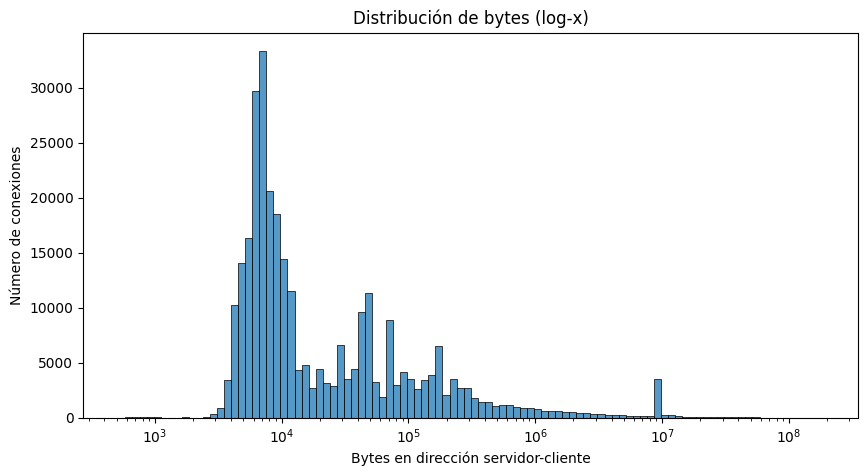

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(df["bytes_servidor_cliente"], bins=100, log_scale=(True, False))
plt.title("Distribución de bytes (log-x)")
plt.xlabel("Bytes en dirección servidor-cliente")
plt.ylabel("Número de conexiones")
plt.show()

In [47]:
peticiones_por_bytes = df.groupby("bytes_servidor_cliente")["num_pet_http"].agg(
    cantidad_distintos="nunique",
    cantidad="count"
).reset_index()
peticiones_por_bytes.sort_values(by="cantidad_distintos", ascending=False, inplace=True)
peticiones_por_bytes.head(20)

,bytes_servidor_cliente,cantidad_distintos,cantidad
5295,8220,8,28
3822,6747,8,47
5028,7953,8,20
5083,8008,8,23
3288,6213,7,13
6593,9518,7,8
3069,5994,7,19
5591,8516,7,12
2700,5625,7,29
3441,6366,7,66


In [48]:
df[df["bytes_servidor_cliente"] == 8220]

,bytes_servidor_cliente,num_pet_http,codigos_http,dominio_tls,puerto,bytes_bin
90328,8220,1,200,fonts.googleapis.com,443,8000
78575,8220,1,200,accounts.google.com,443,8000
238218,8220,6,"(200, 200, 200, 200, 200, 200)",cdn77.api.userway.org,443,8000
161696,8220,5,"(200, 200, 403, 200, 200)",firebase.googleapis.com,443,8000
101160,8220,2,"(200, 200)",cdn.usefathom.com,443,8000
59460,8220,3,"(200, 200, 200)",browser.events.data.microsoft.com,443,8000
227744,8220,2,"(200, 200)",cdn.usefathom.com,443,8000
55599,8220,1,200,accounts.google.com,443,8000
91735,8220,2,"(403, 403)",content-autofill.googleapis.com,443,8000
84258,8220,1,200,accounts.google.com,443,8000


In [49]:
delta = 500    # 500 bytes +-
df["bytes_bin"] = (df["bytes_servidor_cliente"] // delta) * delta
peticiones_por_bin = df.groupby("bytes_bin")["num_pet_http"].agg(
    cantidad_distintos="nunique",
    cantidad="count"
).reset_index()

peticiones_por_bin.sort_values(by="cantidad_distintos", ascending=False, inplace=True)
peticiones_por_bin.head(20)



,bytes_bin,cantidad_distintos,cantidad
18,9500,34,10462
20,10500,33,1503
42,21500,30,515
19,10000,29,4778
26,13500,28,1005
22,11500,28,1466
21,11000,27,4819
25,13000,27,893
45,23000,27,491
181,91000,27,96
